In [1]:
%load_ext autoreload

import sys
sys.path.append('../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ceedub as cw

from scipy.signal import argrelmax
from scipy.optimize import minimize_scalar

import ecc_prior as ep

%matplotlib inline
%autoreload 2

In [3]:
GMsun = 1.32712440018e20  # m^3/s^2
c = 299792458 # m/s
Tsun = GMsun / c**3

# Test covariance stuff in EccBurst

In [4]:
Mtot = 40
q = 0.2
tstar = -0.1
fstar = 100
destar = 0.25

eb = ep.EccBurst(q)

M2sec = Mtot*Tsun
tM = tstar/M2sec
fM = fstar*M2sec

print("Mc = {:.2f}".format(eb.Mchirp * Mtot))

rstar = ep.ecc_prior._rp_kepler(destar, fstar, Mtot)
print("r = {:.2f}".format(rstar))

Mc = 12.24
r = 4.85


In [5]:
t1, f1, r1, de1 = eb.tf_forward(tM, fM, rstar, destar)
tn, fn, den = eb.tfe_forward(tM, fM, destar)

ts = (tM*M2sec, t1*M2sec, tn*M2sec)
fs = (fM/M2sec, f1/M2sec, fn/M2sec)
des = (destar, de1, den)

print(ts, (t1-tn)/t1)
print(fs, (f1-fn)/f1)
print(des, (de1-den)/de1)

(-0.1, 0.005830052442583624, 0.005830052442583624) 0.0
(100.0, 103.2171563308743, 103.00777772700245) 0.0020285252114547844
(0.25, 0.3141889871504674, 0.31528633872027856) -0.0034926481025435727


In [6]:
t1, f1, r1, de1 = eb.tf_backward(tM, fM, rstar, destar)
tn, fn, den = eb.tfe_backward(tM, fM, destar)

ts = (tM*M2sec, t1*M2sec, tn*M2sec)
fs = (fM/M2sec, f1/M2sec, fn/M2sec)
des = (destar, de1, den)

print(ts, (t1-tn)/t1)
print(fs, (f1-fn)/f1)
print(des, (de1-den)/de1)

(-0.1, -0.20583005244258362, -0.20583005244258362) -0.0
(100.0, 96.97638022663031, 96.94214607877848) 0.00035301531952236856
(0.25, 0.18581101284953266, 0.18964991904893394) -0.020660272717580915


In [7]:
tmin, tmax = -5/M2sec, 1/M2sec
bursts = eb.get_all_bursts(tM, fM, destar, tmin, tmax)
bur_old = eb.get_all_bursts_old(tM, fM, destar, tmin, tmax)

In [8]:
bursts_SI = np.array([[t*M2sec, f/M2sec, de] for t,f,de in bursts])
bur_old_SI = np.array([[t*M2sec, f/M2sec, de] for t,f,de in bur_old])

In [11]:
eb._rp_kepler(np.array(bursts)[-1,2], np.array(bursts)[-1,1])

2.7003548217631286

In [12]:
ts, fs, des = bursts_SI.T
to, fo, deo = bur_old_SI.T

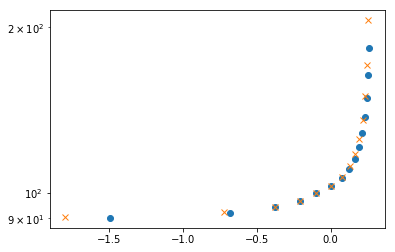

In [14]:
plt.plot(ts, fs, ls='none', marker='o')
plt.plot(to, fo, ls='none', marker='x')
plt.yscale('log')